In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os
import glob
import datetime
import numpy as np

In [2]:
start_of_day_path = '/Users/archydeberker/Downloads/20200330-062004.csv'
end_of_day_path = '/Users/archydeberker/Downloads/20200330-212019.csv'

In [6]:
df_start = pd.read_csv(start_of_day_path)
df_end = pd.read_csv(end_of_day_path)

In [7]:
df_start.head()

,wine_name,id,stock
0,19 Crimes Shiraz/Grenache/Mataro,207143,620
1,Abadia Retuerta Seleccion Especial,305444,158
2,Abreu Cappella Rutherford,252878,2
3,Abreu Las Posadas North Coast,252869,2
4,Alain Chavy Puligny-Montrachet Premier Cru Les...,285290,10


In [8]:
df_end.head()

,wine_name,id,stock
0,19 Crimes Shiraz/Grenache/Mataro,207143,582
1,Abadia Retuerta Seleccion Especial,305444,153
2,Abreu Cappella Rutherford,252878,2
3,Abreu Las Posadas North Coast,252869,2
4,Alain Chavy Puligny-Montrachet Premier Cru Les...,285290,7


In [45]:
df = df_start.set_index('id').join(df_end.set_index('id'), lsuffix='_start', rsuffix='_end')

In [46]:
df.drop('wine_name_end', axis=1, inplace=True)

In [47]:
df['stock_diff'] = df['stock_end'] - df['stock_start']

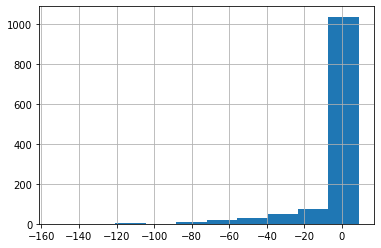

In [49]:
df['stock_diff'].hist()

In [55]:
df.sort_values(by='stock_diff', ascending=True, inplace=True)
df.head()

,wine_name_start,stock_start,stock_end,stock_diff
id,,,,
293555,Bonpas Ventoux Grande Réserve des Challières,502,349.0,-153.0
167342,Folonari Pinot Grigio Trevenezie,576,469.0,-107.0
248045,Crama Regala Sauvignon Blanc,511,405.0,-106.0
251822,Beau Bonhomme Jumilla,455,375.0,-80.0
294728,Pfaff Pinot Gris Alsace,606,529.0,-77.0


In [61]:
fig = go.Figure(data=[
    go.Bar(name='Start of day', x=df.wine_name_start, y=df.stock_start),
    go.Bar(name='End of day', x=df.wine_name_start, y=df.stock_end)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [59]:
def get_most_popular_wines(df_start, df_end):
    """
    Returns a dataframe sorted by wine sales between `df_start` and `df_end`
    """
    df = df_start.set_index('id').join(df_end.set_index('id'), lsuffix='_start', rsuffix='_end')
    df['stock_diff'] = df['stock_end'] - df['stock_start']
    df.sort_values(by='stock_diff', inplace=True)
    return df

In [124]:
df = get_most_popular_wines(df_start, df_end)

In [125]:
all_store_data = glob.glob('/Users/archydeberker/Desktop/code/saq/data/2020*.csv')

In [126]:
len(all_store_data)

6

In [127]:
def parse_timestamp_from_filename(filename, strformat="%Y%m%d-%H%M%S", suffix='.csv'):
    filename = filename.split('/')[-1]
    filename = filename.rstrip(suffix)
    timestamp = datetime.datetime.strptime(filename, strformat)
    return timestamp

In [128]:
all_data = []
for store in all_store_data:
    df = pd.read_csv(store)
    df['timestamp'] = parse_timestamp_from_filename(store)
    all_data.append(df)

In [154]:
all_timestamps_df = pd.concat(all_data)
all_timestamps_df.sort_values(by='wine_name', inplace=True)

In [155]:
px.line(all_timestamps_df[:100], x='timestamp', y='stock', color='wine_name')

In [156]:
all_timestamps_df

,wine_name,id,stock,timestamp
0,19 Crimes Shiraz/Grenache/Mataro,207143,592,2020-03-29 18:23:51
24,19 Crimes Shiraz/Grenache/Mataro,207143,572,2020-03-30 20:25:44
0,19 Crimes Shiraz/Grenache/Mataro,207143,572,2020-03-30 20:25:44
40,19 Crimes Shiraz/Grenache/Mataro,207143,592,2020-03-29 18:23:51
18,19 Crimes Shiraz/Grenache/Mataro,207143,592,2020-03-29 18:19:55
...,...,...,...,...
761,Ökonomierat Rebholz Birkweiler Mandelberg Weis...,253718,4,2020-03-29 18:23:51
833,Ökonomierat Rebholz Birkweiler Mandelberg Weis...,253718,4,2020-03-30 20:25:44
730,Ökonomierat Rebholz Birkweiler Mandelberg Weis...,253718,4,2020-03-29 19:04:51
806,Ökonomierat Rebholz Birkweiler Mandelberg Weis...,253718,4,2020-03-29 19:55:17


In [157]:
now = datetime.datetime.now()


In [158]:
# We want to find the closest point to 24 hours ago from now
one_day_ago = abs((now - datetime.timedelta(days=1)) - all_timestamps_df['timestamp'])
timestamp_one_day_ago = all_timestamps_df['timestamp'].iloc[one_day_ago.argmin()]

In [159]:
most_recent = all_timestamps_df['timestamp'].max()

In [160]:
most_recent

Timestamp('2020-03-30 20:25:44')

In [161]:
timestamp_one_day_ago

Timestamp('2020-03-29 19:55:17')

In [162]:
stock_change_df = all_timestamps_df.loc[all_timestamps_df['timestamp'] == most_recent]

In [163]:
len(stock_change_df)

1199

In [169]:
stock_change_df['stock_1_day_ago']  =  all_timestamps_df.loc[all_timestamps_df['timestamp'] == timestamp_one_day_ago].stock
stock_change_df['timestamp_1_day_ago']  =  all_timestamps_df.loc[all_timestamps_df['timestamp'] == timestamp_one_day_ago].timestamp

/Users/archydeberker/Desktop/code/saq/saq-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/archydeberker/Desktop/code/saq/saq-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [170]:
stock_change_df

,wine_name,id,stock,timestamp,stock_1_day_ago,timestamp_1_day_ago
24,19 Crimes Shiraz/Grenache/Mataro,207143,572,2020-03-30 20:25:44,587.0,2020-03-29 19:55:17
0,19 Crimes Shiraz/Grenache/Mataro,207143,572,2020-03-30 20:25:44,587.0,2020-03-29 19:55:17
25,Abadia Retuerta Seleccion Especial,305444,151,2020-03-30 20:25:44,156.0,2020-03-29 19:55:17
1,Abadia Retuerta Seleccion Especial,305444,151,2020-03-30 20:25:44,156.0,2020-03-29 19:55:17
26,Abreu Cappella Rutherford,252878,2,2020-03-30 20:25:44,2.0,2020-03-29 19:55:17
...,...,...,...,...,...,...
47,Álvaro Palacios Finca Dofí,258989,24,2020-03-30 20:25:44,2.0,2020-03-29 19:55:17
23,Álvaro Palacios Finca Dofí,258989,24,2020-03-30 20:25:44,2.0,2020-03-29 19:55:17
556,Éric Texier Vieilles Vignes,211814,8,2020-03-30 20:25:44,542.0,2020-03-29 19:55:17
561,Étienne Sauzet Puligny Montrachet,267803,8,2020-03-30 20:25:44,39.0,2020-03-29 19:55:17


In [171]:
stock_change_df['stock_change'] = stock_change_df['stock'] - stock_change_df['stock_1_day_ago']

/Users/archydeberker/Desktop/code/saq/saq-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
stock_change_df.iloc[stock_change_df['stock_change'].argmin()]

wine_name              La Collina di Dioniso Fabio Oberto Barolo
id                                                        277118
stock                                                          7
timestamp                                    2020-03-30 20:25:44
stock_1_day_ago                                              676
timestamp_1_day_ago                          2020-03-29 19:55:17
stock_change                                                -669
Name: 687, dtype: object

In [178]:
stock_change_df.sort_values(by='stock_change', inplace=True)

/Users/archydeberker/Desktop/code/saq/saq-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [179]:
stock_change_df.head()

,wine_name,id,stock,timestamp,stock_1_day_ago,timestamp_1_day_ago,stock_change
687,La Collina di Dioniso Fabio Oberto Barolo,277118,7,2020-03-30 20:25:44,676.0,2020-03-29 19:55:17,-669.0
620,Guy Breton Chiroubles,286709,11,2020-03-30 20:25:44,676.0,2020-03-29 19:55:17,-665.0
619,Gustave Lorentz Riesling Grand Cru Kanzlerberg,289625,15,2020-03-30 20:25:44,674.0,2020-03-29 19:55:17,-659.0
813,Michele Chiarlo Cerequio Barolo,309326,1,2020-03-30 20:25:44,645.0,2020-03-29 19:55:17,-644.0
459,Domaine René Bouvier Gevrey Chambertin Racines...,261863,5,2020-03-30 20:25:44,624.0,2020-03-29 19:55:17,-619.0


In [11]:

class StockCounter:
    def __init__(self):
        self.files = data.storage.list_data_on_s3()
        print(f"Found {len(self.files)} files on S3")
        self.online_files = list(filter(lambda x: bool(re.match(constants.ONLINE_FILE_REGEX, x)), self.files))
        print(f"{len(self.online_files)} of those were for online stock")
        self.online_df = self.load_online_data()
#         print('Getting stock change df')
#         self.stock_change_df = self.get_daily_stock_change_df()

    def load_online_data(self):
        all_data = []
        for file in self.online_files:
            print(file)
            df = data.storage.get_s3_data_to_df(file)
            df['timestamp'] = parse_timestamp_from_filename(file)
            all_data.append(df)

        return pd.concat(all_data)

    def get_daily_stock_change_df(self):
        df = self.online_df
        now = datetime.datetime.now()
        one_day_ago = now - datetime.timedelta(days=1)

        most_recent = self.online_df['timestamp'].max()
        closest_to_one_day_ago = self.online_df['timestamp'].iloc[abs(one_day_ago - self.online_df['timestamp']).argmin()]

        stock_change_df = self.online_df.loc[self.online_df['timestamp'] == most_recent].copy()

        # Care required on the join
        stock_1_day_ago_df = df.loc[df['timestamp'] == closest_to_one_day_ago]

        stock_change_df.join(stock_1_day_ago_df, on=['id'], lsuffix='_now', rsuffix='_1_day_ago')
        print(stock_change_df.columns)

        stock_change_df['stock_change'] = stock_change_df['stock_now'] - stock_change_df['stock_1_day_ago']
        stock_change_df.sort_values(by='stock_change', inplace=True)

        return stock_change_df

    def _negative_stock_change(self, df):
        return self.stock_change_df.loc[self.stock_change_df['stock_change'] <= 0]

    @property
    def bottles_sold(self):
        return abs(self._negative_stock_change(self.stock_change_df)['stock_change'].sum())

    @property
    def glasses_sold(self):
        return abs(self._negative_stock_change(self.stock_change_df)['stock_change'].sum() * constants.GLASSES_IN_A_BOTTLE)


In [12]:
from data import storage, constants
import re

def parse_timestamp_from_filename(filename, strformat="%Y%m%d-%H%M%S", suffix='.csv'):
    filename = filename.split('/')[-1]
    filename = filename.rstrip(suffix)
    timestamp = datetime.datetime.strptime(filename, strformat)
    return timestamp



counter = StockCounter()

Found 61 files on S3
38 of those were for online stock
20200329-182351.csv
20200329-190451.csv
20200329-195517.csv
20200329-232504.csv
20200329-234054.csv
20200330-000039.csv
20200330-000339.csv
20200330-000649.csv
20200330-001231.csv
20200330-001359.csv
20200330-002351.csv
20200330-003518.csv
20200330-004453.csv
20200330-005318.csv
20200330-010406.csv
20200330-020508.csv
20200330-062004.csv
20200330-071447.csv
20200330-081522.csv
20200330-092506.csv
20200330-101648.csv
20200330-111426.csv
20200330-122743.csv
20200330-141904.csv
20200330-151742.csv
20200330-161817.csv
20200330-171735.csv
20200330-181918.csv
20200330-191647.csv
20200330-201522.csv
20200330-202544.csv
20200330-212019.csv
20200330-221315.csv
20200330-221509.csv
20200401-080657.csv
20200401-082344.csv
20200401-084354.csv
20200401-090000.csv


In [14]:
df = counter.online_df

In [15]:
df

,wine_name,id,stock,timestamp,wine_img
0,19 Crimes Shiraz/Grenache/Mataro,207143,592,2020-03-29 18:23:51,NaN
1,Abadia Retuerta Seleccion Especial,305444,156,2020-03-29 18:23:51,NaN
2,Abreu Cappella Rutherford,252878,2,2020-03-29 18:23:51,NaN
3,Albert Bichot Chassagne-Montrachet,238433,4,2020-03-29 18:23:51,NaN
4,Albert Bichot Chambolle Musigny Premier Cru Le...,287237,8,2020-03-29 18:23:51,NaN
...,...,...,...,...,...
1195,Les Pagodes de Cos Saint-Estèphe,261749,13,2020-04-01 09:00:00,https://www.saq.com/media/catalog/product/1/3/...
1196,Les Tourelles de Longueville Pauillac,261239,25,2020-04-01 09:00:00,https://www.saq.com/media/catalog/product/1/3/...
1197,Louis Latour Pommard Premier Cru Epenots,273749,4,2020-04-01 09:00:00,https://www.saq.com/media/wysiwyg/placeholder/...
1198,Lucien Le Moine Pommard 1er Cru Les Rugiens,278339,1,2020-04-01 09:00:00,https://www.saq.com/media/wysiwyg/placeholder/...


In [18]:
now = datetime.datetime.now()
one_day_ago = now - datetime.timedelta(days=1)

most_recent = df['timestamp'].max()
closest_to_one_day_ago = df['timestamp'].iloc[abs(one_day_ago - df['timestamp']).argmin()]

stock_change_df = df.loc[df['timestamp'] == most_recent].copy()

# Care required on the join
stock_1_day_ago_df = df.loc[df['timestamp'] == closest_to_one_day_ago]

stock_change_df.join(stock_1_day_ago_df, on=['id'], lsuffix='_now', rsuffix='_1_day_ago')
print(stock_change_df.columns)

stock_change_df['stock_change'] = stock_change_df['stock_now'] - stock_change_df['stock_1_day_ago']
stock_change_df.sort_values(by='stock_change', inplace=True)

Index(['wine_name', 'id', 'stock', 'timestamp', 'wine_img'], dtype='object')


KeyError: 'stock_now'

In [19]:
stock_1_day_ago_df

,wine_name,id,stock,timestamp,wine_img
0,19 Crimes Shiraz/Grenache/Mataro,207143,565,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/2/...
1,Abadia Retuerta Seleccion Especial,305444,151,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/4/...
2,Abreu Cappella Rutherford,252878,2,2020-03-30 22:15:09,https://www.saq.com/media/wysiwyg/placeholder/...
3,Abreu Las Posadas North Coast,252869,2,2020-03-30 22:15:09,https://www.saq.com/media/wysiwyg/placeholder/...
4,Alain Chavy Puligny-Montrachet Premier Cru Les...,285290,6,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/4/...
...,...,...,...,...,...
1191,Valentini Cerasuolo d'Abruzzo,256418,16,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/3/...
1192,Valmorena Barbera d'Asti,231230,58,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/2/...
1193,Wayne Gretzky Estates No. 99 Cabernet Merlot,249806,20,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/3/...
1194,Weingut Heinrich Graue Freyheit,268118,21,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/3/...


In [20]:
stock_change_df

,wine_name,id,stock,timestamp,wine_img
0,Abadia Retuerta Seleccion Especial,305444,144,2020-04-01 09:00:00,https://www.saq.com/media/catalog/product/1/4/...
1,Abreu Cappella Rutherford,252878,2,2020-04-01 09:00:00,https://www.saq.com/media/wysiwyg/placeholder/...
2,Abreu Las Posadas North Coast,252869,2,2020-04-01 09:00:00,https://www.saq.com/media/wysiwyg/placeholder/...
3,Alain Chavy Puligny-Montrachet Premier Cru Les...,285290,6,2020-04-01 09:00:00,https://www.saq.com/media/catalog/product/1/4/...
4,Alain Chavy Puligny-Montrachet Premier Cru Les...,270803,8,2020-04-01 09:00:00,https://www.saq.com/media/wysiwyg/placeholder/...
...,...,...,...,...,...
1195,Les Pagodes de Cos Saint-Estèphe,261749,13,2020-04-01 09:00:00,https://www.saq.com/media/catalog/product/1/3/...
1196,Les Tourelles de Longueville Pauillac,261239,25,2020-04-01 09:00:00,https://www.saq.com/media/catalog/product/1/3/...
1197,Louis Latour Pommard Premier Cru Epenots,273749,4,2020-04-01 09:00:00,https://www.saq.com/media/wysiwyg/placeholder/...
1198,Lucien Le Moine Pommard 1er Cru Les Rugiens,278339,1,2020-04-01 09:00:00,https://www.saq.com/media/wysiwyg/placeholder/...


In [31]:
stock_change_df.join(stock_1_day_ago_df, on=['id'], how='inner', lsuffix='_now', rsuffix='_1_day_ago')

,id,wine_name_now,id_now,stock_now,timestamp_now,wine_img_now,wine_name_1_day_ago,id_1_day_ago,stock_1_day_ago,timestamp_1_day_ago,wine_img_1_day_ago


In [38]:
stock_1_day_ago_df.set_index('id', inplace=True)

In [39]:
stock_change_df.set_index('id', inplace=True)

In [49]:
stock_change_df = stock_change_df.join(stock_1_day_ago_df, how='right', lsuffix='_now', rsuffix='_1_day_ago')

In [51]:
stock_change_df

,wine_name_now,stock_now,timestamp_now,wine_img_now,wine_name_1_day_ago,stock_1_day_ago,timestamp_1_day_ago,wine_img_1_day_ago,wine_name,stock,timestamp,wine_img
id,,,,,,,,,,,,
147443,Labouré-Roi La Princesse Maudite Côteaux Bourg...,469.0,2020-04-01 09:00:00,https://www.saq.com/media/catalog/product/5/7/...,Labouré-Roi La Princesse Maudite Côteaux Bourg...,501,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/5/7/...,Labouré-Roi La Princesse Maudite Côteaux Bourg...,501,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/5/7/...
147446,Frescobaldi Nipozzano Chianti Rufina,397.0,2020-04-01 09:00:00,https://www.saq.com/media/catalog/product/1/0/...,Frescobaldi Nipozzano Chianti Rufina,406,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/0/...,Frescobaldi Nipozzano Chianti Rufina,406,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/0/...
147452,Matua Sauvignon Blanc Marlborough,496.0,2020-04-01 09:00:00,https://www.saq.com/media/catalog/product/1/0/...,Matua Sauvignon Blanc Marlborough,518,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/0/...,Matua Sauvignon Blanc Marlborough,518,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/0/...
147455,Umberto Cesari Moma Rubicone,498.0,2020-04-01 09:00:00,https://www.saq.com/media/catalog/product/1/0/...,Umberto Cesari Moma Rubicone,549,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/0/...,Umberto Cesari Moma Rubicone,549,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/0/...
147482,Mara Valpolicella Ripasso Superiore,423.0,2020-04-01 09:00:00,https://www.saq.com/media/catalog/product/1/0/...,Mara Valpolicella Ripasso Superiore,461,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/0/...,Mara Valpolicella Ripasso Superiore,461,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/0/...
...,...,...,...,...,...,...,...,...,...,...,...,...
309326,Michele Chiarlo Cerequio Barolo,1.0,2020-04-01 09:00:00,https://www.saq.com/media/catalog/product/1/4/...,Michele Chiarlo Cerequio Barolo,1,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/4/...,Michele Chiarlo Cerequio Barolo,1,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/4/...
310070,NaN,0.0,NaT,NaN,Domaine de L'Arlot Nuits Saint Georges La Gerb...,2,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/4/...,Domaine de L'Arlot Nuits Saint Georges La Gerb...,2,2020-03-30 22:15:09,https://www.saq.com/media/catalog/product/1/4/...
312938,Henry of Pelham Cabernet-Merlot Speck Family R...,5.0,2020-04-01 09:00:00,https://www.saq.com/media/wysiwyg/placeholder/...,Henry of Pelham Cabernet-Merlot Speck Family R...,5,2020-03-30 22:15:09,https://www.saq.com/media/wysiwyg/placeholder/...,Henry of Pelham Cabernet-Merlot Speck Family R...,5,2020-03-30 22:15:09,https://www.saq.com/media/wysiwyg/placeholder/...


In [50]:
stock_change_df['stock_now'][stock_change_df['stock_now'].isna()] = 0

/Users/archydeberker/Desktop/code/saq/saq-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
counter.online_df.dtypes

wine_name            object
id                    int64
stock                 int64
timestamp    datetime64[ns]
wine_img             object
dtype: object